## Project

#### Problem Statement:
Pick up the following stocks and generate forecasts accordingly
Stocks:
1. NASDAQ.AAPL
2. NASDAQ.ADP
3. NASDAQ.CBOE
4. NASDAQ.CSCO
5. NASDAQ.EBAY

In [8]:
# Import the necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA, ARMAResults
import datetime
import sys
import seaborn as sns
import statsmodels
import statsmodels.stats.diagnostic as diag
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from scipy.stats.mstats import normaltest

from matplotlib.pyplot import acorr
plt.style.use('fivethirtyeight')
%matplotlib inline

### Get the Data

In [9]:
df = pd.read_csv("data_stocks.csv")
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


#### Clean up

In [10]:
# First understanding the dataset in following cells:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41266 entries, 0 to 41265
Columns: 502 entries, DATE to NYSE.ZTS
dtypes: float64(501), int64(1)
memory usage: 158.0 MB


In [11]:
df.describe()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
count,4.126600e+04,41266.000000,41266.000000,41266.000000,41266.00000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,...,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000
mean,1.497749e+09,2421.537882,47.708346,150.453566,141.31793,79.446873,103.480398,102.998608,50.894352,122.981163,...,97.942211,104.740666,46.664402,43.043984,80.784595,19.300718,54.541988,71.757891,121.423515,60.183874
std,3.822211e+06,39.557135,3.259377,6.236826,6.91674,2.000283,4.424244,9.389788,4.833931,11.252010,...,5.411795,10.606694,1.508444,1.714533,1.840989,11.686532,3.526321,4.038272,5.607070,3.346887
min,1.491226e+09,2329.139900,40.830000,140.160000,128.24000,74.800000,95.870000,83.000000,44.650000,96.250000,...,83.410000,89.510000,44.090000,39.120000,76.060000,6.660000,48.820000,63.180000,110.120000,52.300000
25%,1.494432e+09,2390.860100,44.945400,144.640000,135.19500,78.030000,101.300000,94.820000,47.440000,116.950000,...,95.960000,95.010000,45.155000,41.955000,80.220000,7.045000,51.630000,69.110000,117.580000,59.620000
50%,1.497638e+09,2430.149900,48.360000,149.945000,142.26000,79.410000,102.440000,106.820000,49.509900,123.620000,...,99.250000,99.660000,46.810000,43.200000,81.150000,27.890000,53.850000,73.470000,120.650000,61.585600
75%,1.501090e+09,2448.820100,50.180000,155.065000,147.10000,80.580000,104.660000,110.490000,52.230000,132.218800,...,102.080000,117.034700,47.730000,44.370000,82.062050,30.470000,57.140000,74.750000,126.000000,62.540000
max,1.504210e+09,2490.649900,54.475000,164.510000,155.33000,90.440000,121.770000,119.270000,62.560000,142.875000,...,106.375000,123.870000,49.660000,47.210000,83.630000,32.930000,62.130000,77.120000,133.450000,63.840000


In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
DATE,41266.0,1.497749e+09,3.822211e+06,1.491226e+09,1.494432e+09,1.497638e+09,1.501090e+09,1.504210e+09
SP500,41266.0,2.421538e+03,3.955713e+01,2.329140e+03,2.390860e+03,2.430150e+03,2.448820e+03,2.490650e+03
NASDAQ.AAL,41266.0,4.770835e+01,3.259377e+00,4.083000e+01,4.494540e+01,4.836000e+01,5.018000e+01,5.447500e+01
NASDAQ.AAPL,41266.0,1.504536e+02,6.236826e+00,1.401600e+02,1.446400e+02,1.499450e+02,1.550650e+02,1.645100e+02
NASDAQ.ADBE,41266.0,1.413179e+02,6.916740e+00,1.282400e+02,1.351950e+02,1.422600e+02,1.471000e+02,1.553300e+02
NASDAQ.ADI,41266.0,7.944687e+01,2.000283e+00,7.480000e+01,7.803000e+01,7.941000e+01,8.058000e+01,9.044000e+01
NASDAQ.ADP,41266.0,1.034804e+02,4.424244e+00,9.587000e+01,1.013000e+02,1.024400e+02,1.046600e+02,1.217700e+02
NASDAQ.ADSK,41266.0,1.029986e+02,9.389788e+00,8.300000e+01,9.482000e+01,1.068200e+02,1.104900e+02,1.192700e+02
NASDAQ.AKAM,41266.0,5.089435e+01,4.833931e+00,4.465000e+01,4.744000e+01,4.950990e+01,5.223000e+01,6.256000e+01
NASDAQ.ALXN,41266.0,1.229812e+02,1.125201e+01,9.625000e+01,1.169500e+02,1.236200e+02,1.322188e+02,1.428750e+02


In [13]:
df.get_dtype_counts()

float64    501
int64        1
dtype: int64

In [14]:
df.shape

(41266, 502)

In [15]:
# Checking if there is presence of null values or empty row or column
df.isna().sum().sum()

0

In [16]:
df.isnull().sum().sum()

0

In [17]:
# Cheking any zero values in dataset:
df[df==0].any().sum()

0

In [18]:
# check for any negative value. If presence it can affect our analysis.If presence Remove it.
#Remove checking the datset whether negative value is required or not
df[df<0].any().sum()

0

In [14]:
df.head(6)

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.3700,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.3700,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.5850,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.4600,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.4700,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240
5,1491226500,2365.6201,42.5399,143.7800,130.0700,82.040,102.0400,85.9200,59.610,121.70,...,84.4825,119.580,44.15,39.96,82.03,7.36,50.20,63.84,121.850,53.220


In [3]:
#df.set_index('DATE',inplace=True)

In [4]:
df.head()

,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
DATE,,,,,,,,,,,,,,,,,,,,,
1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,38.99,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,39.01,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,38.91,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,38.84,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,38.93,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [19]:
# We see date need to be clean
df['DATE']=pd.to_datetime(df['DATE'],unit='ms')

In [20]:
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1970-01-18 06:13:46.200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1970-01-18 06:13:46.260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1970-01-18 06:13:46.320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1970-01-18 06:13:46.380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1970-01-18 06:13:46.440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [22]:
df['DATE'].head()

0   1970-01-18 06:13:46.200
1   1970-01-18 06:13:46.260
2   1970-01-18 06:13:46.320
3   1970-01-18 06:13:46.380
4   1970-01-18 06:13:46.440
Name: DATE, dtype: datetime64[ns]

In [23]:
type(df['DATE'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [24]:
# make a copy of it
stock_data=df.copy()

In [30]:
stock_data.set_index('DATE',inplace=True)

In [31]:
stock_data.head()

,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
DATE,,,,,,,,,,,,,,,,,,,,,
1970-01-18 06:13:46.200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,38.99,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1970-01-18 06:13:46.260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,39.01,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
1970-01-18 06:13:46.320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,38.91,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
1970-01-18 06:13:46.380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,38.84,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
1970-01-18 06:13:46.440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,38.93,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


### Data [1]  `NNASDAQ.AAPL`

In [32]:
stock_AAPL = stock_data[['NASDAQ.AAPL']].copy()

In [33]:
stock_AAPL.head()

,NASDAQ.AAPL
DATE,
1970-01-18 06:13:46.200,143.6800
1970-01-18 06:13:46.260,143.7000
1970-01-18 06:13:46.320,143.6901
1970-01-18 06:13:46.380,143.6400
1970-01-18 06:13:46.440,143.6600


In [34]:
stock_AAPL.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
NASDAQ.AAPL,41266.0,150.453566,6.236826,140.16,144.64,149.945,155.065,164.51


In [35]:
stock_AAPL.count()

NASDAQ.AAPL    41266
dtype: int64

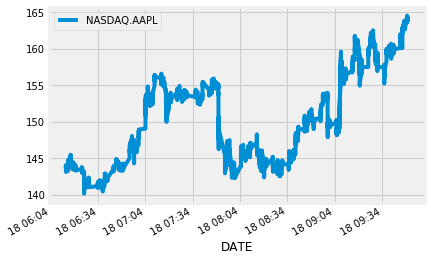

In [36]:
stock_AAPL.plot()

In [37]:
# Change values to log to view more clear plot
stock_AAPL["AAPL_log"]=stock_AAPL["NASDAQ.AAPL"].apply(lambda x:np.log(x))

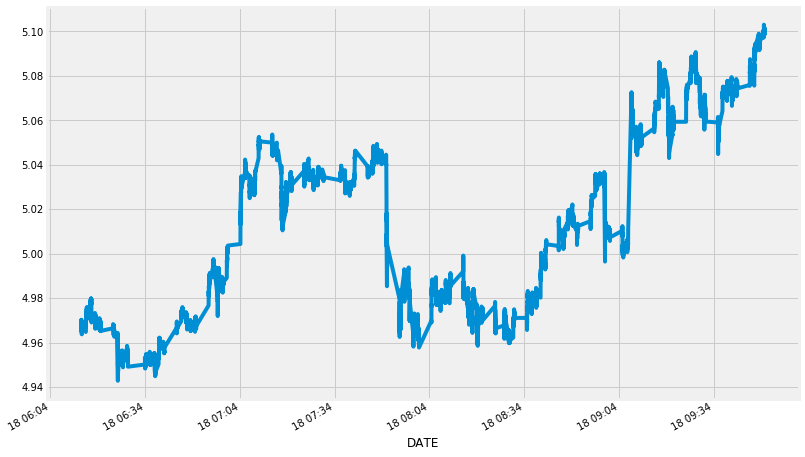

In [38]:
stock_AAPL["AAPL_log"].plot(figsize=(12,8))

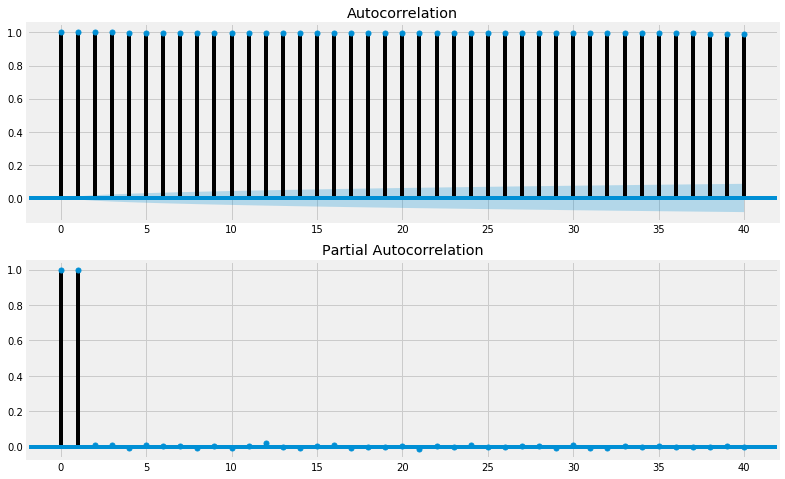

In [39]:
#  plots 
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(stock_AAPL["AAPL_log"].values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(stock_AAPL["AAPL_log"], lags=40, ax=ax2)

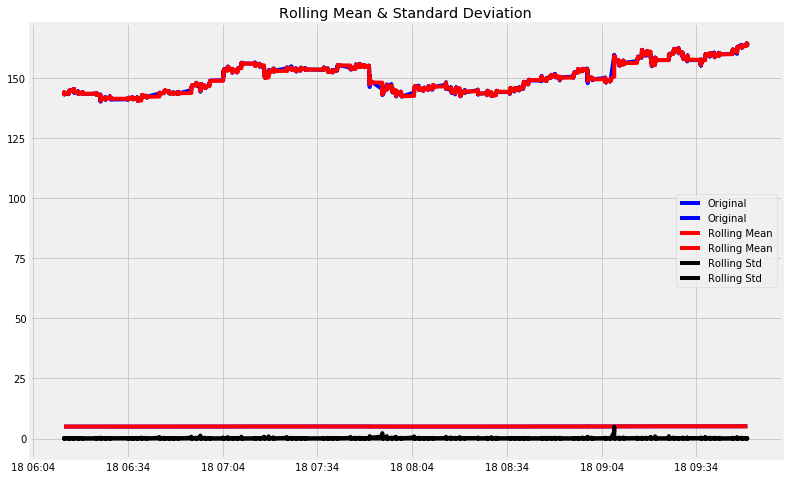

In [40]:
# Plotting Rolling Statistics and check for Statinalry
rolmean = stock_AAPL.rolling(12).mean()
rolstd = stock_AAPL.rolling(12).std()
plt.figure(figsize=(12,8)) 
plt.plot( stock_AAPL, color='blue',label='Original')
plt.plot(rolmean, color='red', label='Rolling Mean')
plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()
# Note: Moving mean and moving std at any instant time 't', we take the mean/std fo the last
# year which in this case is 12 months.

In [41]:

from statsmodels.tsa.stattools import adfuller

def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [43]:
adf_check(stock_AAPL["AAPL_log"])

Augmented Dickey-Fuller Test:
ADF Test Statistic : -0.9613512430114161
p-value : 0.7670983561333815
#Lags Used : 31
Number of Observations Used : 41234
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [55]:
first_diff_AAPL = stock_AAPL["AAPL_log"] - stock_AAPL["AAPL_log"].shift(1)
first_diff_AAPL.head(10)

DATE
1970-01-18 06:13:46.200         NaN
1970-01-18 06:13:46.260    0.000139
1970-01-18 06:13:46.320   -0.000069
1970-01-18 06:13:46.380   -0.000349
1970-01-18 06:13:46.440    0.000139
1970-01-18 06:13:46.500    0.000835
1970-01-18 06:13:46.560    0.000584
1970-01-18 06:13:46.620   -0.000375
1970-01-18 06:13:46.680    0.000035
1970-01-18 06:13:46.740   -0.000104
Name: AAPL_log, dtype: float64

In [56]:
adf_check(first_diff_AAPL.dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -35.706087115770536
p-value : 0.0
#Lags Used : 30
Number of Observations Used : 41234
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


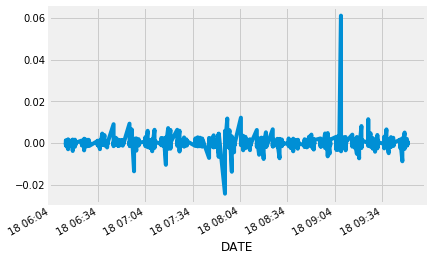

In [57]:
first_diff_AAPL.plot()

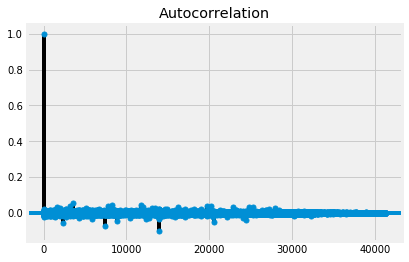

In [58]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig_first = plot_acf(first_diff_AAPL.dropna())

KeyboardInterrupt: 

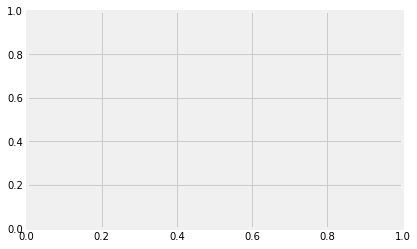

In [59]:
result = plot_pacf(first_diff_AAPL.dropna())

### ARIMA MODEL

In [60]:
from statsmodels.tsa.arima_model import ARIMA

In [61]:


#p,d,q 
#p -> Periods taken for auto regressive model
#d -> Integrated order, difference
#q -> Periods in moving average model


In [64]:
import warnings
warnings.filterwarnings('ignore')
ararray =stock_AAPL['AAPL_log'].values
pdq=[]
aic=[]
d=1
for p in range(6):
    for q in range(4):
        
        try:
            model = ARIMA(ararray,order=(p,d,q)) 
            arima_results = model.fit()
            aic.append(arima_results.aic)
            pdq.append((p,d,q))
            print((p,d,q),arima_results.aic)
        except:
            continue
keys = pdq
values = aic

d = dict(zip(keys, values))
minaic=min(d, key=d.get)

for i in range(3):
    p=minaic[0]
    d=minaic[1]
    q=minaic[2]
print ("Best Model is :", (p,d,q))


(0, 1, 0) -492712.8852838061
(0, 1, 1) -492714.54918343306
(0, 1, 2) -492725.7039907831
(0, 1, 3) -492724.6188867537
(1, 1, 0) -492714.42411386466
(1, 1, 1) -492714.93875463656
(1, 1, 2) -492726.4035785734
(2, 1, 0) -492725.43926753814
(2, 1, 1) -492725.85024407005
(3, 1, 0) -492724.379943694
(3, 1, 1) -492722.3516781576
(3, 1, 2) -492710.3223709635
(3, 1, 3) -492689.7278201139
(4, 1, 0) -492731.9127525218
(4, 1, 1) -492729.93421060045
(4, 1, 2) -492727.94295479124
(4, 1, 3) -492722.9741088046
(5, 1, 0) -492730.4755908544
(5, 1, 1) -492728.478559908
(5, 1, 2) -492726.4686534045
(5, 1, 3) -492724.5074139965
Best Model is : (4, 1, 0)


In [65]:
model_arima = ARIMA(stock_AAPL["AAPL_log"],order=(4,1,0))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

-492731.9127525218


In [66]:
#Experimental summary function for ARIMA Results
model_arima_fit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: ARIMA
======================================================================
Model:              ARIMA            BIC:                 -492680.1461
Dependent Variable: D.AAPL_log       Log-Likelihood:      2.4637e+05  
Date:               2019-01-12 13:39 Scale:               1.0000      
No. Observations:   41265            Method:              css-mle     
Df Model:           5                Sample:              1           
Df Residuals:       41260                                 6           
Converged:          1.0000           S.D. of innovations: 0.001       
No. Iterations:     1.0000           HQIC:                -492715.551 
AIC:                -492731.9128                                      
-----------------------------------------------------------------------
                    Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
-----------------------------------------------------------------------
const               0.0000    0.0000   1.0930  0.2744  -0.0000   0.0000
ar.L1.D.AAPL_log   -0.0093    0.0049  -1.8828  0.0597  -0.0189   0.0004
ar.L2.D.AAPL_log   -0.0180    0.0049  -3.6534  0.0003  -0.0276  -0.0083
ar.L3.D.AAPL_log    0.0046    0.0049   0.9411  0.3466  -0.0050   0.0143
ar.L4.D.AAPL_log   -0.0152    0.0049  -3.0881  0.0020  -0.0248  -0.0056
--------------------------------------------------------------------------------
                 Real            Imaginary           Modulus           Frequency
--------------------------------------------------------------------------------
AR.1           -1.8656             -2.0599            2.7791             -0.3671
AR.2           -1.8656              2.0599            2.7791              0.3671
AR.3            2.0179             -2.1085            2.9185             -0.1285
AR.4            2.0179              2.1085            2.9185              0.1285
======================================================================

"""

In [67]:
help(model_arima_fit.forecast)

Help on method forecast in module statsmodels.tsa.arima_model:

forecast(steps=1, exog=None, alpha=0.05) method of statsmodels.tsa.arima_model.ARIMAResults instance
    Out-of-sample forecasts
    
    Parameters
    ----------
    steps : int
        The number of out of sample forecasts from the end of the
        sample.
    exog : array
        If the model is an ARIMAX, you must provide out of sample
        values for the exogenous variables. This should not include
        the constant.
    alpha : float
        The confidence intervals for the forecasts are (1 - alpha) %
    
    Returns
    -------
    forecast : array
        Array of out of sample forecasts
    stderr : array
        Array of the standard error of the forecasts.
    conf_int : array
        2d array of the confidence interval for the forecast
    
    Notes
    -----
    Prediction is done in the levels of the original endogenous variable.
    If you would like prediction of differences in levels use `predic

In [68]:
# let see the forecast
model_arima_fit.forecast(15)

(array([5.09975237, 5.09975117, 5.09976924, 5.09976318, 5.09976611,
        5.09976962, 5.09977255, 5.09977589, 5.0997791 , 5.0997823 ,
        5.0997855 , 5.0997887 , 5.09979191, 5.09979511, 5.09979831]),
 array([0.00061775, 0.0008696 , 0.00105706, 0.00121747, 0.00135499,
        0.00147982, 0.00159504, 0.00170244, 0.0018035 , 0.0018992 ,
        0.00199029, 0.0020774 , 0.00216099, 0.00224147, 0.00231916]),
 array([[5.09854159, 5.10096314],
        [5.09804679, 5.10145554],
        [5.09769745, 5.10184103],
        [5.09737699, 5.10214937],
        [5.09711037, 5.10242185],
        [5.09686922, 5.10267001],
        [5.09664634, 5.10289876],
        [5.09643917, 5.10311261],
        [5.0962443 , 5.1033139 ],
        [5.09605994, 5.10350465],
        [5.09588461, 5.1036864 ],
        [5.09571709, 5.10386032],
        [5.09555644, 5.10402737],
        [5.09540191, 5.10418831],
        [5.09525284, 5.10434379]]))

In [69]:
model_arima_fit.forecast(15)[0]

array([5.09975237, 5.09975117, 5.09976924, 5.09976318, 5.09976611,
       5.09976962, 5.09977255, 5.09977589, 5.0997791 , 5.0997823 ,
       5.0997855 , 5.0997887 , 5.09979191, 5.09979511, 5.09979831])

### Data [2]  `NNASDAQ.ADP`

In [70]:
stock_ADP = stock_data[['NASDAQ.ADP']].copy()

In [71]:
stock_ADP.head()

,NASDAQ.ADP
DATE,
1970-01-18 06:13:46.200,102.2300
1970-01-18 06:13:46.260,102.1400
1970-01-18 06:13:46.320,102.2125
1970-01-18 06:13:46.380,102.1400
1970-01-18 06:13:46.440,102.0600


In [72]:
stock_ADP.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
NASDAQ.ADP,41266.0,103.480398,4.424244,95.87,101.3,102.44,104.66,121.77


In [73]:
stock_ADP.count()

NASDAQ.ADP    41266
dtype: int64

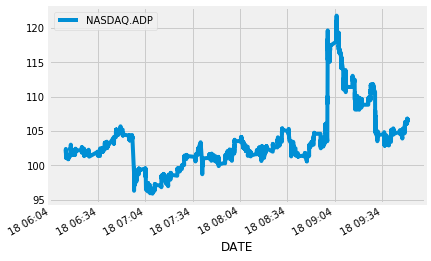

In [74]:
stock_ADP.plot()

In [75]:
# Change values to log to view more clear plot
stock_ADP["ADP_log"]=stock_ADP["NASDAQ.ADP"].apply(lambda x:np.log(x))


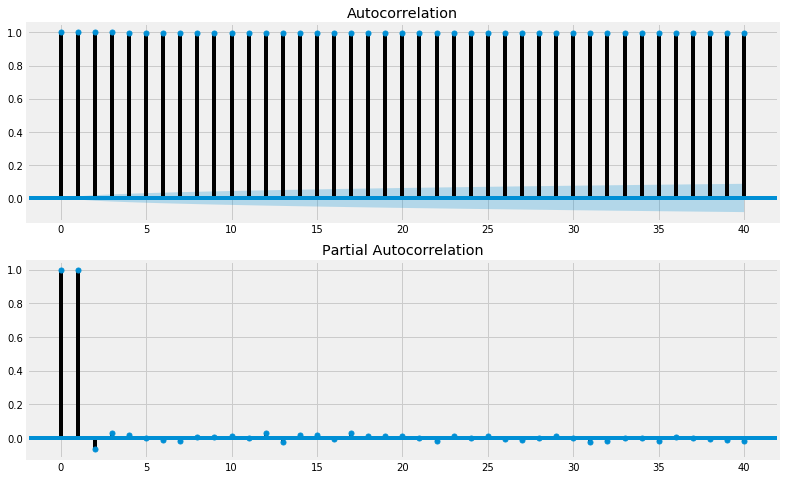

In [76]:
#  plots 
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(stock_ADP["ADP_log"].values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(stock_ADP["ADP_log"], lags=40, ax=ax2)


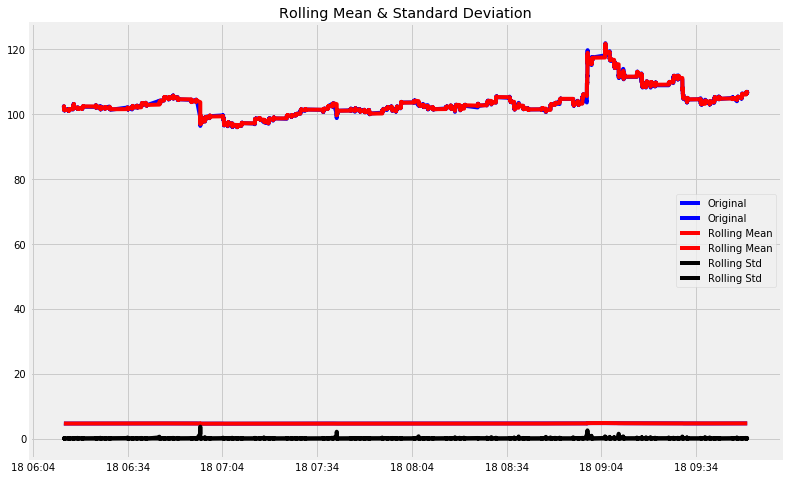

In [79]:
# Plotting Rolling Statistics and check for Statinalry
rolmean = stock_ADP.rolling(12).mean()
rolstd = stock_ADP.rolling(12).std()
plt.figure(figsize=(12,8)) 
plt.plot( stock_ADP, color='blue',label='Original')
plt.plot(rolmean, color='red', label='Rolling Mean')
plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()
# Note: Moving mean and moving std at any instant time 't', we take the mean/std fo the last
# year which in this case is 12 months.


In [80]:
from statsmodels.tsa.stattools import adfuller

def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")



In [82]:
adf_check(stock_ADP["ADP_log"])

Augmented Dickey-Fuller Test:
ADF Test Statistic : -1.685115371801558
p-value : 0.4387973407039347
#Lags Used : 40
Number of Observations Used : 41225
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [83]:
first_diff_ADP = stock_ADP["ADP_log"] - stock_ADP["ADP_log"].shift(1)
first_diff_ADP.head(10)


DATE
1970-01-18 06:13:46.200         NaN
1970-01-18 06:13:46.260   -0.000881
1970-01-18 06:13:46.320    0.000710
1970-01-18 06:13:46.380   -0.000710
1970-01-18 06:13:46.440   -0.000784
1970-01-18 06:13:46.500   -0.000196
1970-01-18 06:13:46.560    0.002838
1970-01-18 06:13:46.620    0.000391
1970-01-18 06:13:46.680    0.000098
1970-01-18 06:13:46.740   -0.000488
Name: ADP_log, dtype: float64

In [84]:
adf_check(first_diff_ADP.dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -30.76041440957817
p-value : 0.0
#Lags Used : 39
Number of Observations Used : 41225
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


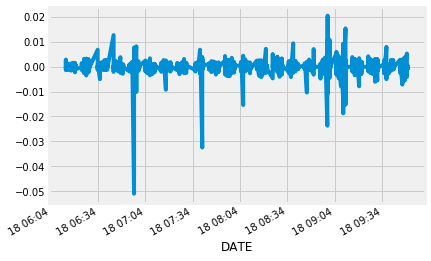

In [85]:
first_diff_ADP.plot()

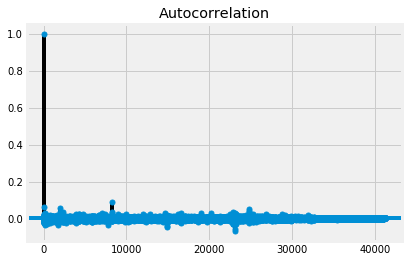

In [89]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig_first = plot_acf(first_diff_ADP.dropna())


In [91]:
import warnings
warnings.filterwarnings('ignore')
ararray =stock_ADP['ADP_log'].values
pdq=[]
aic=[]
d=1
for p in range(6):
    for q in range(4):
        
        try:
            model = ARIMA(ararray,order=(p,d,q)) 
            arima_results = model.fit()
            aic.append(arima_results.aic)
            pdq.append((p,d,q))
            print((p,d,q),arima_results.aic)
        except:
            continue
keys = pdq
values = aic

d = dict(zip(keys, values))
minaic=min(d, key=d.get)

for i in range(3):
    p=minaic[0]
    d=minaic[1]
    q=minaic[2]
print ("Best Model is :", (p,d,q))

#p,d,q 
#p -> Periods taken for auto regressive model
#d -> Integrated order, difference
#q -> Periods in moving average model


(0, 1, 0) -482540.10380391026
(0, 1, 1) -482692.3343443653
(0, 1, 2) -482706.1151290868
(0, 1, 3) -482721.22203156527
(1, 1, 0) -482685.45681778237
(1, 1, 1) -482700.7756248617
(1, 1, 2) -482714.32540719677
(1, 1, 3) -482720.0613621449
(2, 1, 0) -482712.0599475545
(2, 1, 1) -482716.8786892473
(2, 1, 2) -482725.6127312104
(2, 1, 3) -482735.5096725307
(3, 1, 0) -482723.4203108647
(3, 1, 1) -482721.4176123149
(3, 1, 2) -482735.3974188644
(4, 1, 0) -482721.4343598838
(4, 1, 1) -482719.45229770604
(4, 1, 2) -482724.0384595903
(5, 1, 0) -482723.697430933
(5, 1, 1) -482721.2670575639
(5, 1, 2) -482719.21231583273
(5, 1, 3) -482721.7368129592
Best Model is : (2, 1, 3)


In [92]:
model_arima = ARIMA(stock_ADP["ADP_log"],order=(2,1,3))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)


-482735.5096725307


In [93]:
#Experimental summary function for ARIMA Results
model_arima_fit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: ARIMA
======================================================================
Model:              ARIMA            BIC:                 -482675.1153
Dependent Variable: D.ADP_log        Log-Likelihood:      2.4137e+05  
Date:               2019-01-12 14:22 Scale:               1.0000      
No. Observations:   41265            Method:              css-mle     
Df Model:           6                Sample:              1           
Df Residuals:       41259                                 6           
Converged:          1.0000           S.D. of innovations: 0.001       
No. Iterations:     40.0000          HQIC:                -482716.421 
AIC:                -482735.5097                                      
-----------------------------------------------------------------------
                      Coef.   Std.Err.    t     P>|t|    [0.025  0.975]
-----------------------------------------------------------------------
const                 0.0000    0.0000  0.2772  0.7816  -0.0000  0.0000
ar.L1.D.ADP_log       0.8529       nan     nan     nan      nan     nan
ar.L2.D.ADP_log      -0.6618       nan     nan     nan      nan     nan
ma.L1.D.ADP_log      -0.7922       nan     nan     nan      nan     nan
ma.L2.D.ADP_log       0.5885       nan     nan     nan      nan     nan
ma.L3.D.ADP_log       0.0368       nan     nan     nan      nan     nan
-------------------------------------------------------------------------------
                  Real            Imaginary          Modulus          Frequency
-------------------------------------------------------------------------------
AR.1              0.6444            -1.0468           1.2292            -0.1622
AR.2              0.6444             1.0468           1.2292             0.1622
MA.1              0.6666            -1.0603           1.2525            -0.1607
MA.2              0.6666             1.0603           1.2525             0.1607
MA.3            -17.3422            -0.0000          17.3422            -0.5000
======================================================================

"""

In [94]:
# let see the forecast
model_arima_fit.forecast(15)

(array([4.66794401, 4.66795242, 4.66793282, 4.66791133, 4.66790676,
        4.66791788, 4.66793119, 4.66793596, 4.66793203, 4.6679263 ,
        4.66792481, 4.66792813, 4.66793273, 4.66793526, 4.66793516]),
 array([0.00069728, 0.00101649, 0.00124831, 0.0014358 , 0.00160015,
        0.00175215, 0.00189517, 0.00202891, 0.00215313, 0.00226911,
        0.002379  , 0.00248454, 0.00258647, 0.00268479, 0.00277942]),
 array([[4.66657737, 4.66931066],
        [4.66596015, 4.6699447 ],
        [4.66548617, 4.67037947],
        [4.66509721, 4.67072544],
        [4.66477053, 4.67104299],
        [4.66448372, 4.67135204],
        [4.66421672, 4.67164565],
        [4.66395938, 4.67191255],
        [4.66371197, 4.67215208],
        [4.66347893, 4.67237367],
        [4.66326206, 4.67258756],
        [4.66305852, 4.67279774],
        [4.66286334, 4.67300212],
        [4.66267317, 4.67319735],
        [4.6624876 , 4.67338271]]))

### Data [3] `NNASDAQ.CBOE`

In [96]:
stock_CBOE = stock_data[['NASDAQ.CBOE']].copy()

In [97]:
stock_CBOE.head()

,NASDAQ.CBOE
DATE,
1970-01-18 06:13:46.200,81.03
1970-01-18 06:13:46.260,81.21
1970-01-18 06:13:46.320,81.21
1970-01-18 06:13:46.380,81.13
1970-01-18 06:13:46.440,81.12


In [99]:
stock_CBOE.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
NASDAQ.CBOE,41266.0,89.325485,5.746178,80.0,84.14,89.315,93.85,101.35


In [100]:
stock_CBOE.count()

NASDAQ.CBOE    41266
dtype: int64

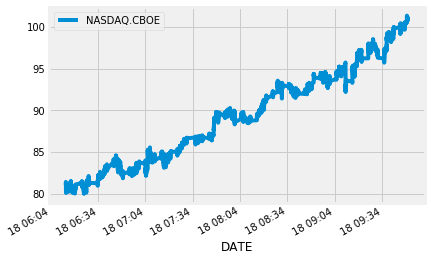

In [101]:
stock_CBOE.plot()

In [102]:
# Change values to log to view more clear plot
stock_CBOE["CBOE_log"]=stock_CBOE["NASDAQ.CBOE"].apply(lambda x:np.log(x))


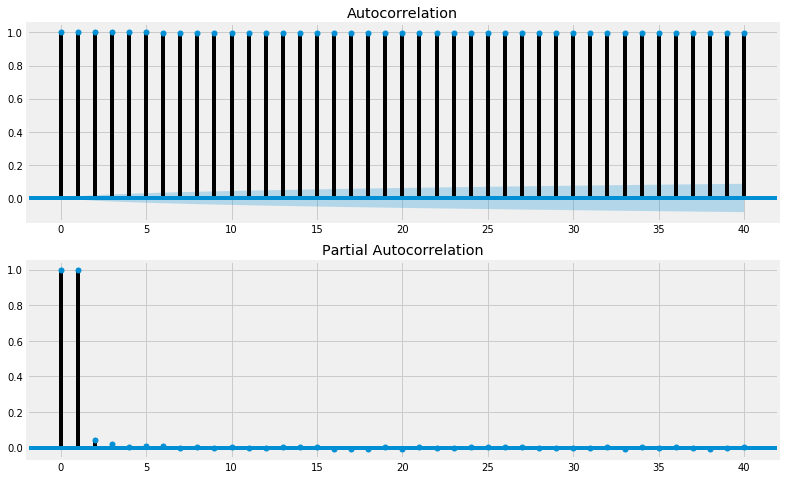

In [104]:
#  plots 
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(stock_CBOE["CBOE_log"].values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(stock_CBOE["CBOE_log"], lags=40, ax=ax2)


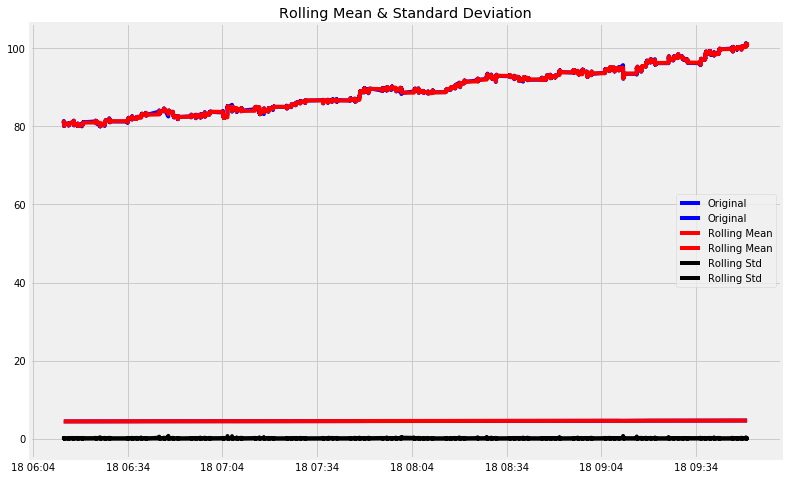

In [105]:
# Plotting Rolling Statistics and check for Statinalry
rolmean = stock_CBOE.rolling(12).mean()
rolstd = stock_CBOE.rolling(12).std()
plt.figure(figsize=(12,8)) 
plt.plot( stock_CBOE, color='blue',label='Original')
plt.plot(rolmean, color='red', label='Rolling Mean')
plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()
# Note: Moving mean and moving std at any instant time 't', we take the mean/std fo the last
# year which in this case is 12 months.


In [106]:
adf_check(stock_CBOE["CBOE_log"])

Augmented Dickey-Fuller Test:
ADF Test Statistic : -0.02590320265544594
p-value : 0.9563367618061652
#Lags Used : 26
Number of Observations Used : 41239
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [107]:
first_diff_CBOE = stock_CBOE["CBOE_log"] - stock_CBOE["CBOE_log"].shift(1)
first_diff_CBOE.head(10) 


DATE
1970-01-18 06:13:46.200         NaN
1970-01-18 06:13:46.260    0.002219
1970-01-18 06:13:46.320    0.000000
1970-01-18 06:13:46.380   -0.000986
1970-01-18 06:13:46.440   -0.000123
1970-01-18 06:13:46.500    0.001232
1970-01-18 06:13:46.560   -0.000739
1970-01-18 06:13:46.620    0.000000
1970-01-18 06:13:46.680    0.000000
1970-01-18 06:13:46.740   -0.000370
Name: CBOE_log, dtype: float64

In [108]:
adf_check(first_diff_CBOE.dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -42.18317183300316
p-value : 0.0
#Lags Used : 25
Number of Observations Used : 41239
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


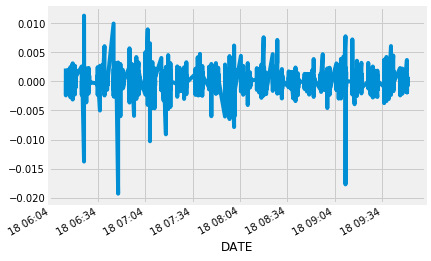

In [109]:
first_diff_CBOE.plot()

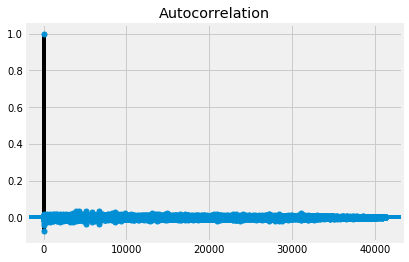

In [110]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig_first = plot_acf(first_diff_CBOE.dropna())


In [111]:
import warnings
warnings.filterwarnings('ignore')
ararray =stock_CBOE['CBOE_log'].values
pdq=[]
aic=[]
d=1
for p in range(6):
    for q in range(4):
        
        try:
            model = ARIMA(ararray,order=(p,d,q)) 
            arima_results = model.fit()
            aic.append(arima_results.aic)
            pdq.append((p,d,q))
            print((p,d,q),arima_results.aic)
        except:
            continue
keys = pdq
values = aic

d = dict(zip(keys, values))
minaic=min(d, key=d.get)

for i in range(3):
    p=minaic[0]
    d=minaic[1]
    q=minaic[2]
print ("Best Model is :", (p,d,q))

#p,d,q 
#p -> Periods taken for auto regressive model
#d -> Integrated order, difference
#q -> Periods in moving average model


(0, 1, 0) -506082.80113987776
(0, 1, 1) -506348.622430122
(0, 1, 2) -506439.5931454194
(0, 1, 3) -506451.0281223402
(1, 1, 0) -506325.69658145064
(1, 1, 1) -506483.0166950226
(1, 1, 2) -506474.90351266693
(1, 1, 3) -506477.71358742856
(2, 1, 0) -506421.09576052835
(2, 1, 1) -506476.0937581118
(2, 1, 2) -506482.3429985917
(2, 1, 3) -506490.94381360733
(3, 1, 0) -506434.5034366057
(3, 1, 1) -506484.4335660327
(3, 1, 2) -506490.40528573084
(3, 1, 3) -506473.6073691413
(4, 1, 0) -506480.08267129643
(4, 1, 1) -506492.86657693563
(4, 1, 2) -506494.1786909017
(4, 1, 3) -506485.1766864554
(5, 1, 0) -506487.26693887205
(5, 1, 1) -506485.5745362255
(5, 1, 2) -506488.31973982044
(5, 1, 3) -506482.1550934393
Best Model is : (4, 1, 2)


In [112]:
model_arima = ARIMA(stock_CBOE["CBOE_log"],order=(4,1,2))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)


-506494.1786909017


In [113]:
#Experimental summary function for ARIMA Results
model_arima_fit.summary2()


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: ARIMA
======================================================================
Model:              ARIMA            BIC:                 -506425.1565
Dependent Variable: D.CBOE_log       Log-Likelihood:      2.5326e+05  
Date:               2019-01-12 14:43 Scale:               1.0000      
No. Observations:   41265            Method:              css-mle     
Df Model:           7                Sample:              1           
Df Residuals:       41258                                 6           
Converged:          0.0000           S.D. of innovations: 0.001       
No. Iterations:     2.0000           HQIC:                -506472.363 
AIC:                -506494.1787                                      
-----------------------------------------------------------------------
                    Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
-----------------------------------------------------------------------
const               0.0000    0.0000   2.5506  0.0108   0.0000   0.0000
ar.L1.D.CBOE_log    0.2657    0.1622   1.6383  0.1014  -0.0522   0.5835
ar.L2.D.CBOE_log    0.1306    0.1149   1.1365  0.2558  -0.0946   0.3559
ar.L3.D.CBOE_log    0.0077    0.0091   0.8410  0.4004  -0.0102   0.0255
ar.L4.D.CBOE_log   -0.0200    0.0076  -2.6512  0.0080  -0.0348  -0.0052
ma.L1.D.CBOE_log   -0.3484    0.1622  -2.1477  0.0317  -0.6664  -0.0305
ma.L2.D.CBOE_log   -0.1540    0.1240  -1.2417  0.2144  -0.3971   0.0891
--------------------------------------------------------------------------------
                 Real            Imaginary           Modulus           Frequency
--------------------------------------------------------------------------------
AR.1           -2.1888             -1.8760            2.8827             -0.3872
AR.2           -2.1888              1.8760            2.8827              0.3872
AR.3            2.3798             -0.5854            2.4508             -0.0384
AR.4            2.3798              0.5854            2.4508              0.0384
MA.1            1.6568              0.0000            1.6568              0.0000
MA.2           -3.9194              0.0000            3.9194              0.5000
======================================================================

"""

In [114]:
# let see the forecast
model_arima_fit.forecast(15)


(array([4.61401159, 4.61400425, 4.61401357, 4.61400629, 4.61400917,
        4.61401247, 4.61401675, 4.61402175, 4.61402687, 4.61403212,
        4.6140374 , 4.61404269, 4.614048  , 4.6140533 , 4.6140586 ]),
 array([0.00052285, 0.00070948, 0.0008433 , 0.00095487, 0.00104799,
        0.00113175, 0.00120869, 0.00128059, 0.00134851, 0.00141311,
        0.00147485, 0.00153411, 0.00159117, 0.00164624, 0.00169953]),
 array([[4.61298683, 4.61503634],
        [4.6126137 , 4.6153948 ],
        [4.61236074, 4.61566641],
        [4.61213479, 4.6158778 ],
        [4.61195515, 4.6160632 ],
        [4.61179429, 4.61623066],
        [4.61164775, 4.61638574],
        [4.61151185, 4.61653165],
        [4.61138384, 4.6166699 ],
        [4.61126248, 4.61680175],
        [4.61114674, 4.61692806],
        [4.61103589, 4.6170495 ],
        [4.61092937, 4.61716662],
        [4.61082672, 4.61727987],
        [4.61072758, 4.61738962]]))

### Data [4] `NNASDAQ.CSCO`

In [115]:
stock_CSCO = stock_data[['NASDAQ.CSCO']].copy()

In [116]:
stock_CSCO.head()

,NASDAQ.CSCO
DATE,
1970-01-18 06:13:46.200,33.7400
1970-01-18 06:13:46.260,33.8800
1970-01-18 06:13:46.320,33.9000
1970-01-18 06:13:46.380,33.8499
1970-01-18 06:13:46.440,33.8400


In [117]:
stock_CSCO.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
NASDAQ.CSCO,41266.0,32.139336,0.985571,30.365,31.455,31.7733,32.79,34.49


In [118]:
stock_CSCO.count()

NASDAQ.CSCO    41266
dtype: int64

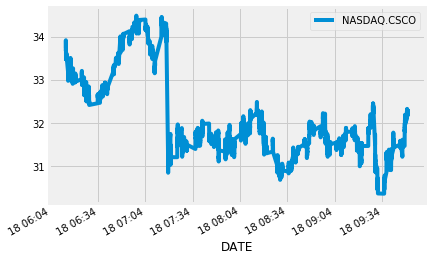

In [119]:
stock_CSCO.plot()

In [120]:
# Change values to log to view more clear plot
stock_CSCO["CSCO_log"]=stock_CSCO["NASDAQ.CSCO"].apply(lambda x:np.log(x))


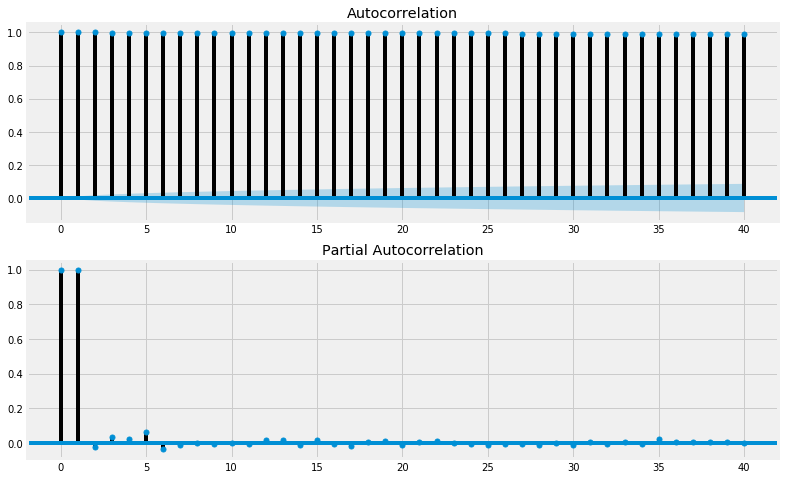

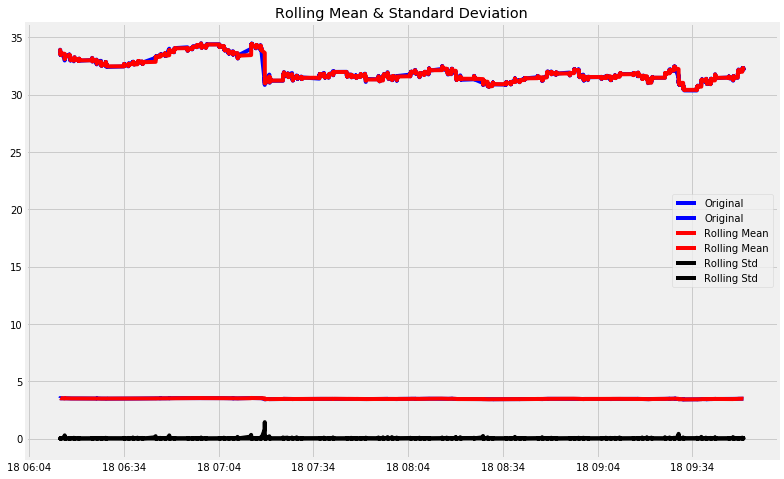

In [121]:
#  plots 
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(stock_CSCO["CSCO_log"].values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(stock_CSCO["CSCO_log"], lags=40, ax=ax2)

# Plotting Rolling Statistics and check for Statinalry
rolmean = stock_CSCO.rolling(12).mean()
rolstd = stock_CSCO.rolling(12).std()
plt.figure(figsize=(12,8)) 
plt.plot( stock_CSCO, color='blue',label='Original')
plt.plot(rolmean, color='red', label='Rolling Mean')
plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()
# Note: Moving mean and moving std at any instant time 't', we take the mean/std fo the last
# year which in this case is 12 months.


In [122]:
adf_check(stock_CSCO["CSCO_log"])

Augmented Dickey-Fuller Test:
ADF Test Statistic : -2.407400174721375
p-value : 0.1396586483836164
#Lags Used : 47
Number of Observations Used : 41218
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [123]:
first_diff_CSCO = stock_CSCO["CSCO_log"] - stock_CSCO["CSCO_log"].shift(1)
first_diff_AAPL.head(10) 


DATE
1970-01-18 06:13:46.200         NaN
1970-01-18 06:13:46.260    0.000139
1970-01-18 06:13:46.320   -0.000069
1970-01-18 06:13:46.380   -0.000349
1970-01-18 06:13:46.440    0.000139
1970-01-18 06:13:46.500    0.000835
1970-01-18 06:13:46.560    0.000584
1970-01-18 06:13:46.620   -0.000375
1970-01-18 06:13:46.680    0.000035
1970-01-18 06:13:46.740   -0.000104
Name: AAPL_log, dtype: float64

In [124]:
adf_check(first_diff_CSCO.dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -30.372404217853845
p-value : 0.0
#Lags Used : 46
Number of Observations Used : 41218
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


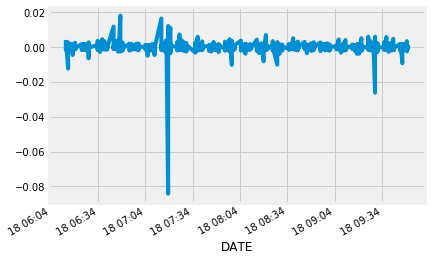

In [125]:
first_diff_CSCO.plot()

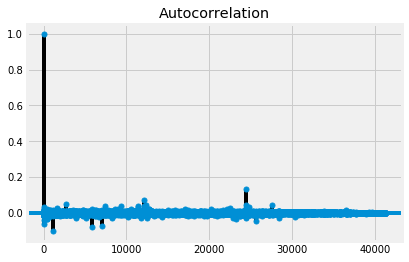

In [126]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig_first = plot_acf(first_diff_CSCO.dropna())


In [127]:
import warnings
warnings.filterwarnings('ignore')
ararray =stock_CSCO['CSCO_log'].values
pdq=[]
aic=[]
d=1
for p in range(6):
    for q in range(4):
        
        try:
            model = ARIMA(ararray,order=(p,d,q)) 
            arima_results = model.fit()
            aic.append(arima_results.aic)
            pdq.append((p,d,q))
            print((p,d,q),arima_results.aic)
        except:
            continue
keys = pdq
values = aic

d = dict(zip(keys, values))
minaic=min(d, key=d.get)

for i in range(3):
    p=minaic[0]
    d=minaic[1]
    q=minaic[2]
print ("Best Model is :", (p,d,q))

#p,d,q 
#p -> Periods taken for auto regressive model
#d -> Integrated order, difference
#q -> Periods in moving average model


(0, 1, 0) -486864.56696222967
(0, 1, 1) -486874.0882304283
(0, 1, 2) -486935.23343127675
(0, 1, 3) -486941.63450909685
(1, 1, 0) -486873.2935201536
(1, 1, 1) -486874.8584519264
(1, 1, 2) -486934.8392227609
(1, 1, 3) -486932.50889306143
(2, 1, 0) -486929.42687429825
(2, 1, 1) -486927.86180309975
(2, 1, 2) -486944.9159766111
(2, 1, 3) -486955.8090860796
(3, 1, 0) -486941.46076415235
(3, 1, 1) -486928.01006447535
(3, 1, 2) -487005.5021789542
(3, 1, 3) -487076.58921022445
(4, 1, 0) -487113.9891544236
(4, 1, 1) -487144.784648187
(4, 1, 2) -487154.34060459747
(4, 1, 3) -487159.39243968646
(5, 1, 0) -487160.92591590784
(5, 1, 1) -487165.52146007866
(5, 1, 2) -487162.49250722537
Best Model is : (5, 1, 1)


In [129]:
model_arima = ARIMA(stock_CSCO["CSCO_log"],order=(5,1,1))

In [130]:
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

-487165.52146007866


In [131]:
#Experimental summary function for ARIMA Results
model_arima_fit.summary2()


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: ARIMA
======================================================================
Model:              ARIMA            BIC:                 -487096.4993
Dependent Variable: D.CSCO_log       Log-Likelihood:      2.4359e+05  
Date:               2019-01-12 15:05 Scale:               1.0000      
No. Observations:   41265            Method:              css-mle     
Df Model:           7                Sample:              1           
Df Residuals:       41258                                 6           
Converged:          1.0000           S.D. of innovations: 0.001       
No. Iterations:     2.0000           HQIC:                -487143.706 
AIC:                -487165.5215                                      
-----------------------------------------------------------------------
                   Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
-----------------------------------------------------------------------
const             -0.0000    0.0000   -0.3614  0.7178  -0.0000   0.0000
ar.L1.D.CSCO_log   0.3616    0.1257    2.8765  0.0040   0.1152   0.6079
ar.L2.D.CSCO_log  -0.0437    0.0055   -7.8796  0.0000  -0.0545  -0.0328
ar.L3.D.CSCO_log  -0.0025    0.0072   -0.3474  0.7283  -0.0165   0.0116
ar.L4.D.CSCO_log  -0.0598    0.0057  -10.5437  0.0000  -0.0709  -0.0487
ar.L5.D.CSCO_log   0.0568    0.0082    6.9086  0.0000   0.0407   0.0729
ma.L1.D.CSCO_log  -0.3450    0.1259   -2.7398  0.0062  -0.5918  -0.0982
--------------------------------------------------------------------------------
                 Real            Imaginary           Modulus           Frequency
--------------------------------------------------------------------------------
AR.1           -1.3100             -1.2381            1.8025             -0.3795
AR.2           -1.3100              1.2381            1.8025              0.3795
AR.3            0.9201             -1.4528            1.7197             -0.1602
AR.4            0.9201              1.4528            1.7197              0.1602
AR.5            1.8324             -0.0000            1.8324             -0.0000
MA.1            2.8983              0.0000            2.8983              0.0000
======================================================================

"""

In [132]:
# let see the forecast
model_arima_fit.forecast(15)


(array([3.47274053, 3.47272519, 3.47272593, 3.4726616 , 3.4726906 ,
        3.47270393, 3.47270595, 3.47270915, 3.47270403, 3.47270211,
        3.4727015 , 3.47270053, 3.47269993, 3.47269881, 3.47269759]),
 array([0.00066082, 0.00094231, 0.00114296, 0.00130785, 0.00143611,
        0.00156238, 0.00168361, 0.00179762, 0.00190559, 0.00200681,
        0.00210296, 0.00219501, 0.00228342, 0.00236862, 0.00245086]),
 array([[3.47144534, 3.47403572],
        [3.47087831, 3.47457208],
        [3.47048578, 3.47496609],
        [3.47009826, 3.47522495],
        [3.46987587, 3.47550533],
        [3.46964171, 3.47576614],
        [3.46940615, 3.47600576],
        [3.46918587, 3.47623242],
        [3.46896913, 3.47643892],
        [3.46876884, 3.47663538],
        [3.46857978, 3.47682322],
        [3.46839838, 3.47700267],
        [3.46822451, 3.47717534],
        [3.4680564 , 3.47734121],
        [3.46789399, 3.47750118]]))

### Data [5] `NNASDAQ.EBAY`

In [133]:
stock_EBAY = stock_data[['NASDAQ.EBAY']].copy()

In [134]:
stock_EBAY.head()

,NASDAQ.EBAY
DATE,
1970-01-18 06:13:46.200,33.3975
1970-01-18 06:13:46.260,33.3950
1970-01-18 06:13:46.320,33.4100
1970-01-18 06:13:46.380,33.3350
1970-01-18 06:13:46.440,33.4000


In [135]:
stock_EBAY.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
NASDAQ.EBAY,41266.0,34.794506,1.099296,31.89,34.065,34.77,35.61,37.46


In [136]:
stock_EBAY.count()

NASDAQ.EBAY    41266
dtype: int64

In [137]:
# Change values to log to view more clear plot
stock_EBAY["EBAY_log"]=stock_EBAY["NASDAQ.EBAY"].apply(lambda x:np.log(x))


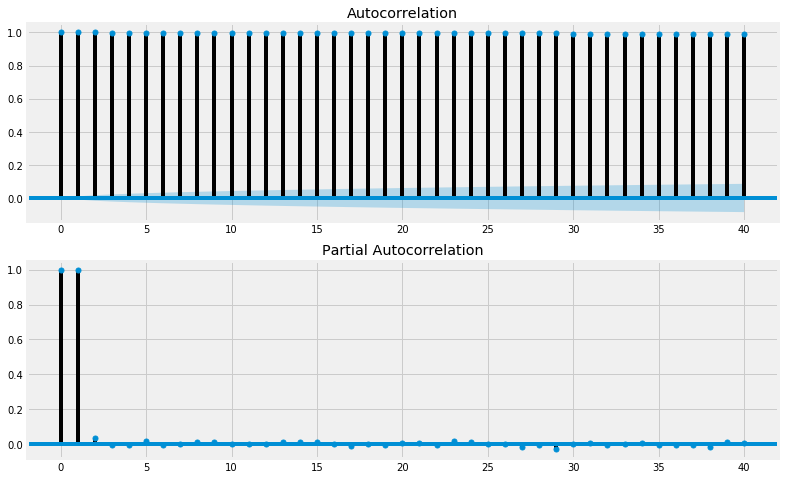

In [138]:
#  plots 
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(stock_EBAY["EBAY_log"].values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(stock_EBAY["EBAY_log"], lags=40, ax=ax2)


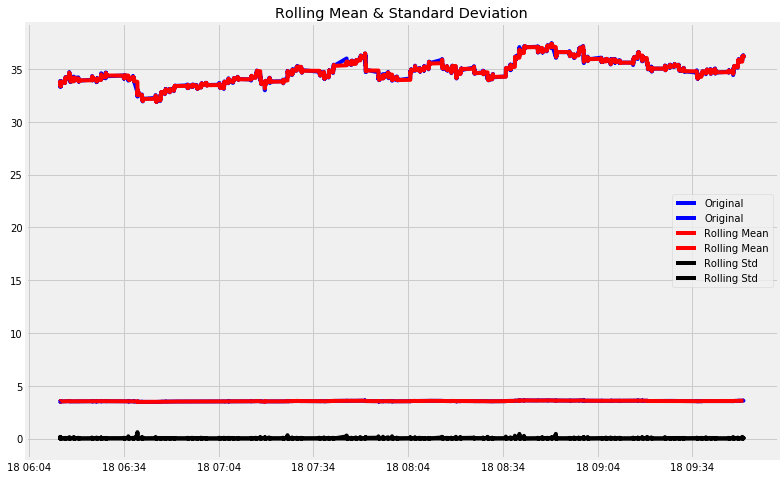

In [139]:
# Plotting Rolling Statistics and check for Statinalry
rolmean = stock_EBAY.rolling(12).mean()
rolstd = stock_EBAY.rolling(12).std()
plt.figure(figsize=(12,8)) 
plt.plot( stock_EBAY, color='blue',label='Original')
plt.plot(rolmean, color='red', label='Rolling Mean')
plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()
# Note: Moving mean and moving std at any instant time 't', we take the mean/std fo the last
# year which in this case is 12 months.


In [140]:
adf_check(stock_EBAY["EBAY_log"])

Augmented Dickey-Fuller Test:
ADF Test Statistic : -1.8796533095759245
p-value : 0.3416925338017296
#Lags Used : 47
Number of Observations Used : 41218
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [142]:
first_diff_EBAY = stock_EBAY["EBAY_log"] - stock_EBAY["EBAY_log"].shift(1)
first_diff_EBAY.head(10) 


DATE
1970-01-18 06:13:46.200         NaN
1970-01-18 06:13:46.260   -0.000075
1970-01-18 06:13:46.320    0.000449
1970-01-18 06:13:46.380   -0.002247
1970-01-18 06:13:46.440    0.001948
1970-01-18 06:13:46.500    0.000898
1970-01-18 06:13:46.560    0.001046
1970-01-18 06:13:46.620    0.001940
1970-01-18 06:13:46.680    0.001043
1970-01-18 06:13:46.740    0.001042
Name: EBAY_log, dtype: float64

In [143]:
adf_check(first_diff_EBAY.dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -30.65636344492932
p-value : 0.0
#Lags Used : 46
Number of Observations Used : 41218
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


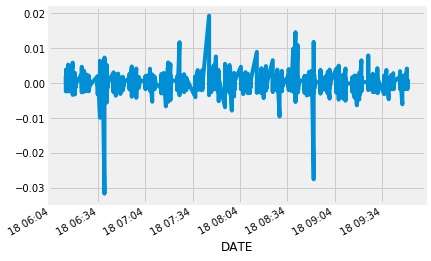

In [144]:
first_diff_EBAY.plot()

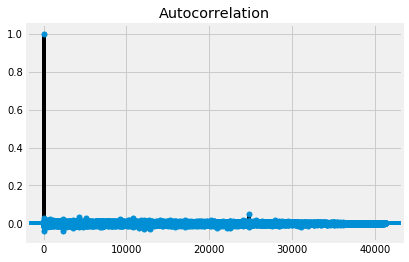

In [145]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig_first = plot_acf(first_diff_EBAY.dropna())



In [146]:
import warnings
warnings.filterwarnings('ignore')
ararray =stock_EBAY['EBAY_log'].values
pdq=[]
aic=[]
d=1
for p in range(6):
    for q in range(4):
        
        try:
            model = ARIMA(ararray,order=(p,d,q)) 
            arima_results = model.fit()
            aic.append(arima_results.aic)
            pdq.append((p,d,q))
            print((p,d,q),arima_results.aic)
        except:
            continue
keys = pdq
values = aic

d = dict(zip(keys, values))
minaic=min(d, key=d.get)

for i in range(3):
    p=minaic[0]
    d=minaic[1]
    q=minaic[2]
print ("Best Model is :", (p,d,q))

#p,d,q 
#p -> Periods taken for auto regressive model
#d -> Integrated order, difference
#q -> Periods in moving average model


(0, 1, 0) -486538.7533912184
(0, 1, 1) -486602.16899928125
(0, 1, 2) -486602.6289060174
(0, 1, 3) -486600.58634705073
(1, 1, 0) -486603.1022564465
(1, 1, 1) -486602.43095997244
(1, 1, 2) -486600.75200824265
(2, 1, 0) -486602.718164505
(2, 1, 1) -486600.71749242663
(2, 1, 2) -486598.77385617676
(3, 1, 0) -486600.7221205102
(3, 1, 1) -486598.7147355977
(3, 1, 2) -486596.7446473406
(3, 1, 3) -486607.1305494999
(4, 1, 0) -486609.64758105227
(4, 1, 1) -486607.4210882506
(4, 1, 2) -486605.4085979054
(4, 1, 3) -486603.41639129317
(5, 1, 0) -486610.5052059593
(5, 1, 1) -486608.4774668673
(5, 1, 2) -486606.48345309915
(5, 1, 3) -486604.48207123845
Best Model is : (5, 1, 0)


In [147]:
model_arima = ARIMA(stock_EBAY["EBAY_log"],order=(5,1,0))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)


-486610.5052059593


In [148]:
#Experimental summary function for ARIMA Results
model_arima_fit.summary2()


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: ARIMA
======================================================================
Model:              ARIMA            BIC:                 -486550.1108
Dependent Variable: D.EBAY_log       Log-Likelihood:      2.4331e+05  
Date:               2019-01-12 15:14 Scale:               1.0000      
No. Observations:   41265            Method:              css-mle     
Df Model:           6                Sample:              1           
Df Residuals:       41259                                 6           
Converged:          1.0000           S.D. of innovations: 0.001       
No. Iterations:     2.0000           HQIC:                -486591.417 
AIC:                -486610.5052                                      
-----------------------------------------------------------------------
                    Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
-----------------------------------------------------------------------
const               0.0000    0.0000   0.6056  0.5448  -0.0000   0.0000
ar.L1.D.EBAY_log   -0.0395    0.0049  -8.0259  0.0000  -0.0492  -0.0299
ar.L2.D.EBAY_log    0.0065    0.0049   1.3101  0.1902  -0.0032   0.0161
ar.L3.D.EBAY_log   -0.0004    0.0049  -0.0804  0.9359  -0.0101   0.0093
ar.L4.D.EBAY_log   -0.0159    0.0049  -3.2347  0.0012  -0.0256  -0.0063
ar.L5.D.EBAY_log    0.0083    0.0049   1.6904  0.0910  -0.0013   0.0180
--------------------------------------------------------------------------------
                 Real            Imaginary           Modulus           Frequency
--------------------------------------------------------------------------------
AR.1           -1.8048             -1.4256            2.2999             -0.3936
AR.2           -1.8048              1.4256            2.2999              0.3936
AR.3            1.1730             -2.4023            2.6734             -0.1777
AR.4            1.1730              2.4023            2.6734              0.1777
AR.5            3.1783             -0.0000            3.1783             -0.0000
======================================================================

"""

In [149]:
# let see the forecast
model_arima_fit.forecast(15)


(array([3.58711616, 3.58711918, 3.5871253 , 3.58712035, 3.58712499,
        3.58712664, 3.58712852, 3.58713057, 3.58713237, 3.58713431,
        3.58713621, 3.58713811, 3.58714002, 3.58714192, 3.58714383]),
 array([0.0006653 , 0.00092248, 0.00112523, 0.00129634, 0.00144271,
        0.0015781 , 0.00170253, 0.00181851, 0.00192758, 0.00203073,
        0.00212891, 0.00222276, 0.0023128 , 0.00239947, 0.00248311]),
 array([[3.5858122 , 3.58842013],
        [3.58531116, 3.5889272 ],
        [3.58491989, 3.58933071],
        [3.58457957, 3.58966113],
        [3.58429733, 3.58995264],
        [3.58403362, 3.59021967],
        [3.58379162, 3.59046543],
        [3.58356635, 3.59069479],
        [3.58335439, 3.59091035],
        [3.58315415, 3.59111447],
        [3.58296361, 3.5913088 ],
        [3.58278158, 3.59149464],
        [3.58260701, 3.59167303],
        [3.58243905, 3.5918448 ],
        [3.58227702, 3.59201064]]))